# Welcome! 

For this visualizaton assignment dealing with multivariate data, __I will be visualizing the mean squared error of a neural network as it adjusts its weights__. Neural networks (at least the one I will be using here) use multivariate gradient descent in order to minimize error. 

The super awesome thing about this visualization is the fact that I will be using a neural network that I built to help with the visualizations- I named it "loris" after one of my favorite animals :) Note, additionally, that a lot of code I use for the network is inspired by what I learned in Fall CSC630 with Dr. Zufelt. 

The loris network has a built-in ability to record all weight values for a trial and the mean squared error assocated with those weights. This will enable us to easily visualize the MSE in a graph, since all data we need will be right there in the record of weights and MSEs. 

### The Plan: 

__I will train the neural network 3 times, selecting a different learning rate each time__. The learning rate is the value that multiplies each partial derivative with respect to a weight before it is subtracted from a weight. A smaller learning rate therefore increases the precision by which we minimize the error of the network's predictions but also slows the rate at which error is minimized. 

By creating scatterplots where x = number of neural network trials and y = mean squared error, we will visualize the neural network's prediction accuracy and gain insight into why the accuracy has increased. 

Also... I apologize for how confusing my explanations of the neural network are. It is currently 3:00 AM, and it is challenging to explain machine learning concepts at this hour. If you would like a better explanation of anything included here, please shoot me an email and I will be happy to reply! 

## Imports

In [20]:
import numpy as np
import math
from neuralnetmath import *
import matplotlib.pyplot as plt
import pandas as pd
import random

## Neural Network Code

In [21]:
for label in ["a", "b", "c", "d", "e_", "f", "g", "h", "i", "j", "k", "l", "m"]: # weights
    locals()[label] = mathvar(label) 

def absolute(x):
    """
    Return the absolute value of x.
    """
    if isinstance(x, (int, float)):
        return x if x > 0 else -1 * x
    else: 
        return x.evaluate()


def MSE(y, y_hat):
    """
    Return mean squared error (MSE) of lists y and y_hat. 
    """
    ers = 0
    for x in range(len(y)):
        #print("whole: ", y_hat[x], "items: ", y_hat[x].items)
        ers += (y[x]  -  y_hat[x])**2 
    return ers / len(y)

In [22]:
class loris():
    

        
    def __init__(self, lr, max_attempts=10, record_weights=True):
        """
        Small, artificial neural network. Made by Isaac Heitmann.  

        Parameters:
        __________
        
        > lr: float or int, between 0 and 1 inclusive. Learning rate (e.g. how much does the network adjust the weights by each try?)

        > max_attempts: int. How many attempts should the network make? 


        Methods:
        ________

        > .modfit(xdata, ydata): fit model on training data. 

        > .predict(data): predict the outcome of data. 

        """


        self.lr = lr
        self.max_attempts = max_attempts
        self.weights = {"a":random.uniform(0.01,1),
                        "b":random.uniform(0.01,1), 
                        "c":random.uniform(0.01,1), 
                        "d":random.uniform(0.01,1), 
                        "e_":random.uniform(0.01,1), 
                        "f":random.uniform(0.01,1), 
                        "g":random.uniform(0.01,1), 
                        "h":random.uniform(0.01,1), 
                        "i":random.uniform(0.01,1), 
                        "j":random.uniform(0.01,1), 
                        "k":random.uniform(0.01,1), 
                        "l":random.uniform(0.01,1), 
                        "m":random.uniform(0.01,1), 
                        "BT1":random.uniform(0.01,2)} # we can change this later
        self.record_weights = record_weights


    def modfit(self, xdata, ydata):
        """
        Fit the 3-input-node model on the training data.

        Parameters: 
        ___________

        > xdata: features. 

        > ydata: labels. Number of rows of xdata and ydata should be equivalent. 
        """

        # Feedforward, Set up all relevant variables
        yhat = []

        for label in ["a", "b", "c", "d", "e_", "f", "g", "h", "i", "j", "k", "l", "m"]: # weights
            locals()[label] = mathvar(label) 

        # For each datum in the dataset, we'll need to generate new input nodes (this way, we can successfully evaluate the resultant MAE)
        for datum in range(len(ydata)): # for each datum in the dataset, we set up a prediction
            NA1 = mathvar("NA1"+["a", "b", "c", "d", "e", "f"][datum]) # input nodes and bias term
            NA2 = mathvar("NA2"+["a", "b", "c", "d", "e", "f"][datum])
            NA3 = mathvar("NA3"+["a", "b", "c", "d", "e", "f"][datum])
            BT1 = mathvar("BT1")
            
            NB1 = reluL(NA1 * a + NA2 * d + NA3 * g) # Hidden layer
            NB2 = reluL(NA1 * b + NA2 * e_ + NA3 * h)
            NB3 = reluL(NA1 * c + NA2 * f + NA3 * i)

            O1 = sigmoid(NB1 * j + NB2 * k + NB3 * l + BT1 * m) # Output layer
            yhat.append(O1) # this represents a prediction, once its evaluated...
            self.weights["NA1"+["a", "b", "c", "d", "e", "f"][datum]] = xdata.iloc[datum, 0]
            self.weights["NA2"+["a", "b", "c", "d", "e", "f"][datum]] = xdata.iloc[datum, 1]
            self.weights["NA3"+["a", "b", "c", "d", "e", "f"][datum]] = xdata.iloc[datum, 2]#... and these are the values for which the prediction is made. 

        # Back Propogation
        mse = MSE(ydata, yhat)
        print("initial loss: ", mse(self.weights)) #initial loss
        n_attempts = 0
        record = pd.DataFrame(columns=["a", "b", "c", "d", "e_", "f", "g", "h", "i", "j", "k", "l", "m", "BT1", "MSE"], 
                              index=[i for i in range(self.max_attempts)])
        record_d = pd.DataFrame(columns=["a", "b", "c", "d", "e_", "f", "g", "h", "i", "j", "k", "l", "m", "BT1", "MSE"], 
                                index=[i for i in range(self.max_attempts)])
                                
        while n_attempts <= self.max_attempts:
            
            # IMPORTANT: Find the partial derivatives of the MAE with respect to each weight, then subtract that from each weight (and bias term). 
            for label in ["a", "b", "c", "d", "e_", "f", "g", "h", "i", "j", "k", "l", "m", "BT1"]:
                record.at[n_attempts, label] = self.weights[label]
                record_d.at[n_attempts, "MSE"]  = mse(self.weights)
                record_d.at[n_attempts, label]  = mse.d(self.weights, label) 
                self.weights[label] -= mse.d(self.weights, label) * self.lr 
            n_attempts += 1    

        print(mse(self.weights)) #display loss
        if self.record_weights:
            return record, record_d
            
    def predict(self, xdata):
        """
        Use weights to predict y-values for xdata. Can be performed even before fitting weights using modfit, although predictions may not be accurate. 
        """
        yhat = []

        for datum in range(len(xdata)): # for each datum in the dataset, we set up a prediction
            NA1 = mathvar("NA1"+["a", "b", "c", "d", "e", "f"][datum]) # input nodes and bias term
            NA2 = mathvar("NA2"+["a", "b", "c", "d", "e", "f"][datum])
            NA3 = mathvar("NA3"+["a", "b", "c", "d", "e", "f"][datum])
            BT1 = mathvar("BT1")
            
            NB1 = reluL(NA1 * a + NA2 * d + NA3 * g) # Hidden layer
            NB2 = reluL(NA1 * b + NA2 * e_ + NA3 * h)
            NB3 = reluL(NA1 * c + NA2 * f + NA3 * i)

            O1 = sigmoid(NB1 * j + NB2 * k + NB3 * l + BT1 * m) # Output layer

            self.weights["NA1"+["a", "b", "c", "d", "e", "f"][datum]] = xdata.iloc[datum, 0]
            self.weights["NA2"+["a", "b", "c", "d", "e", "f"][datum]] = xdata.iloc[datum, 1]
            self.weights["NA3"+["a", "b", "c", "d", "e", "f"][datum]] = xdata.iloc[datum, 2]# these are the values for which the prediction is made. 

            yhat.append(O1(self.weights)) # this is the prediction itself. 

        return yhat



## Quick Dataset

In [23]:
# This dataset includes smoknig, obesity, and exercise as features and diabetes as the target. 
data = pd.DataFrame(data = {"Smoking":[0,0,1,1,1], 
                            "Obesity":[1,0,0,1,1],
                            "Exercise":[0,1,0,0,1],
                            "Diabetic":[1,0,0,1,1]})
                            
data.index = ["Person 1", "Person 2", "Person 3", "Person 4", "Person 5"]

data

,Smoking,Obesity,Exercise,Diabetic
Person 1,0,1,0,1
Person 2,0,0,1,0
Person 3,1,0,0,0
Person 4,1,1,0,1
Person 5,1,1,1,1


## Using the Neural Network

In [24]:
# first training
loris1 = loris(lr = 1, max_attempts = 100)
trial1 = loris1.modfit(xdata = data[["Smoking", "Obesity", "Exercise"]], ydata = data["Diabetic"])
trial1[0]


initial loss:  0.20325130735461286
0.10086174523472816


,a,b,c,d,e_,f,g,h,i,j,k,l,m,BT1,MSE
0,0.322148,0.62812,0.933786,0.653835,0.822481,0.558978,0.097794,0.184795,0.615449,0.113609,0.341515,0.614961,0.046188,0.121143,NaN
1,0.324779,0.597723,0.81829,0.66596,0.822603,0.523424,0.104668,0.167962,0.516897,0.127617,0.348102,0.579932,0.035004,0.110721,NaN
2,0.332021,0.578912,0.731926,0.683479,0.833684,0.506438,0.115091,0.159843,0.441906,0.145397,0.361195,0.555773,0.025675,0.102,NaN
3,0.341028,0.565931,0.663176,0.703643,0.850171,0.499555,0.126552,0.155916,0.381512,0.164883,0.377713,0.538578,0.017609,0.094452,NaN
4,0.349798,0.555012,0.605321,0.724505,0.868483,0.498057,0.137394,0.153351,0.330587,0.184716,0.395739,0.526094,0.010491,0.087792,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.015629,-0.024204,-0.019623,0.875783,0.980806,0.898471,-0.012308,-0.060888,-0.034057,0.917137,1.294823,1.101728,-0.040473,0.040473,NaN
97,-0.012439,-0.020504,-0.016298,0.881805,0.988838,0.905104,-0.010076,-0.058616,-0.031875,0.919361,1.297248,1.103965,-0.040473,0.040473,NaN
98,-0.009527,-0.017137,-0.013269,0.887378,0.996277,0.911253,-0.008044,-0.056569,-0.0299,0.921455,1.299536,1.106073,-0.040473,0.040473,NaN
99,-0.006856,-0.01406,-0.010497,0.89256,1.003199,0.916976,-0.006189,-0.054721,-0.028109,0.923433,1.301701,1.108067,-0.040473,0.040473,NaN


In [28]:
# first training
loris2 = loris(lr = 0.1, max_attempts = 500)
trial2 = loris2.modfit(xdata = data[["Smoking", "Obesity", "Exercise"]], ydata =data["Diabetic"])
trial2[0]


initial loss:  0.2256056245388996
0.06393396885584515


,a,b,c,d,e_,f,g,h,i,j,k,l,m,BT1,MSE
0,0.13339,0.341179,0.422008,0.578165,0.750163,0.94811,0.278933,0.32898,0.738671,0.905535,0.442819,0.025353,0.878589,0.736637,NaN
1,0.126979,0.335807,0.417806,0.574233,0.74618,0.944001,0.270856,0.323466,0.734418,0.904695,0.441065,0.021443,0.863427,0.721639,NaN
2,0.120839,0.330676,0.413827,0.570651,0.742475,0.940106,0.26301,0.318164,0.730399,0.904005,0.439479,0.017716,0.848658,0.707035,NaN
3,0.114973,0.325791,0.410073,0.56742,0.739049,0.936429,0.255402,0.313076,0.726618,0.903463,0.438061,0.014177,0.834288,0.69283,NaN
4,0.109382,0.32115,0.406544,0.564539,0.735902,0.932969,0.248032,0.308204,0.723073,0.903068,0.436811,0.010829,0.820319,0.679025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.000208,0.001583,0.408629,1.019105,0.843044,0.518288,0.003997,0.006096,1.177165,1.918783,1.138982,-0.759245,0.068005,-0.066254,NaN
497,-0.002401,0.000509,0.410687,1.023883,0.842455,0.51743,0.003892,0.006503,1.180864,1.920761,1.140603,-0.760447,0.067997,-0.066262,NaN
498,0.002826,-0.000652,0.412735,1.020446,0.845787,0.516563,0.003821,0.006892,1.184569,1.922719,1.142221,-0.761668,0.067989,-0.06627,NaN
499,0.000146,0.002915,0.414799,1.017146,0.845244,0.515709,0.003835,0.007343,1.188283,1.924702,1.143854,-0.762837,0.067981,-0.066277,NaN


In [30]:
# first training
loris3 = loris(lr = 0.05, max_attempts = 1000)
trial3 = loris3.modfit(xdata = data[["Smoking", "Obesity", "Exercise"]], ydata = data["Diabetic"])
trial3[0]


initial loss:  0.3303240581854511
0.08144728973572046


,a,b,c,d,e_,f,g,h,i,j,k,l,m,BT1,MSE
0,0.490483,0.419383,0.381314,0.83527,0.697868,0.220185,0.663535,0.494191,0.90135,0.889637,0.49887,0.676076,0.684789,1.636786,NaN
1,0.48607,0.416635,0.377595,0.83171,0.6957,0.218115,0.659181,0.491617,0.896994,0.888084,0.497626,0.674321,0.678041,1.63001,NaN
2,0.481615,0.413859,0.373836,0.828121,0.693512,0.216027,0.654779,0.489015,0.892586,0.88652,0.496372,0.672546,0.671219,1.623161,NaN
3,0.47712,0.411055,0.370037,0.824506,0.691307,0.213922,0.650331,0.486383,0.888125,0.884945,0.495106,0.670751,0.664325,1.616239,NaN
4,0.472584,0.408224,0.3662,0.820864,0.689083,0.211801,0.645837,0.483723,0.883612,0.883359,0.493829,0.668935,0.657358,1.609246,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.000016,-0.001376,0.000211,1.08483,0.829403,0.495975,-0.001422,-0.000636,0.000024,1.591532,0.948632,0.605977,-0.477492,0.479344,NaN
997,-0.002908,-0.001013,-0.000865,1.085979,0.830069,0.495691,-0.001046,-0.000362,-0.001122,1.591831,0.94886,0.606113,-0.4775,0.479336,NaN
998,-0.002387,-0.000652,-0.000645,1.08712,0.830731,0.496048,-0.000673,-0.000089,-0.000957,1.592128,0.949087,0.606249,-0.477507,0.479329,NaN
999,-0.001871,-0.000294,-0.000426,1.088252,0.831387,0.496402,-0.000304,0.000181,-0.000795,1.592422,0.949312,0.606383,-0.477515,0.479322,NaN


## Visualizing Loss over Time

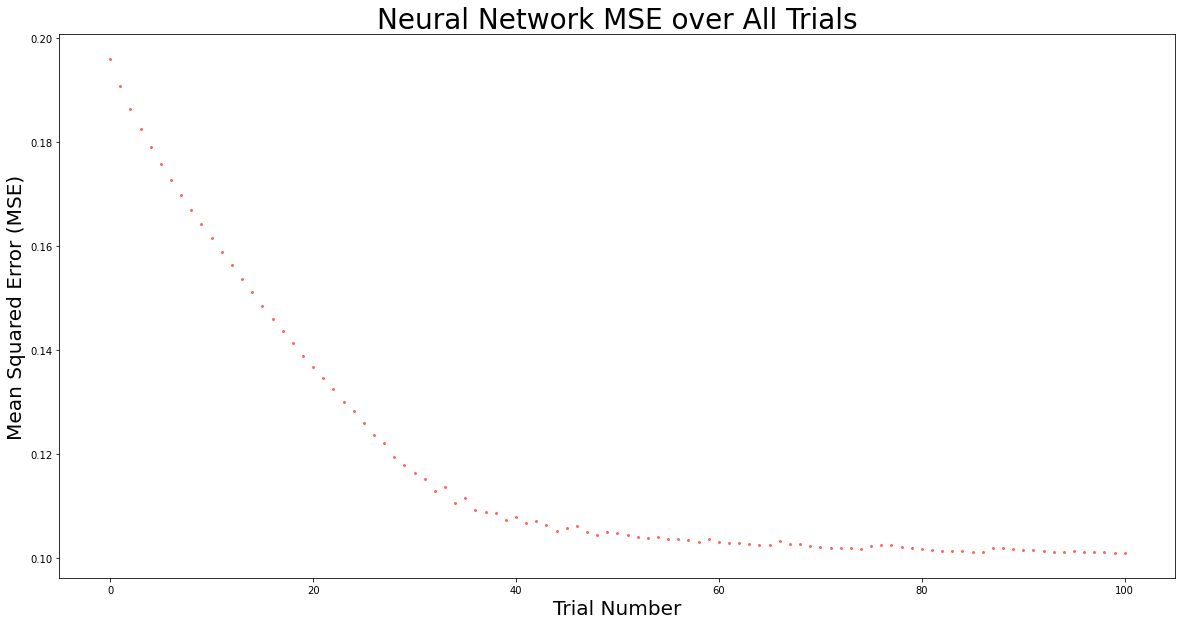

In [35]:
# plot 1
plt.figure(figsize = (20,10))

plt.xlabel(xlabel="Trial Number", fontsize = 20)
plt.ylabel(ylabel="Mean Squared Error (MSE)", fontsize = 20)
plt.title(label="Neural Network MSE over All Trials", fontsize = 28)

plt.scatter(x = trial1[0].index, 
            y = trial1[1]["MSE"],
            c = "red",
            alpha = 0.5,
            s = 4)

plt.show()

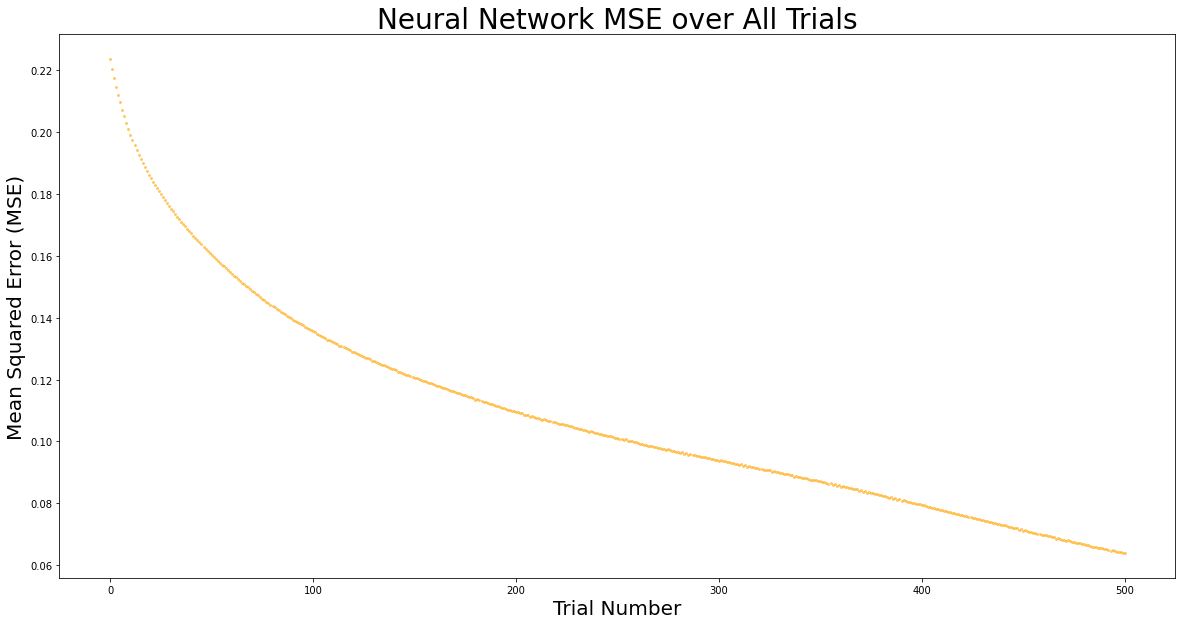

In [36]:
# plot 2
plt.figure(figsize = (20,10))

plt.xlabel(xlabel="Trial Number", fontsize = 20)
plt.ylabel(ylabel="Mean Squared Error (MSE)", fontsize = 20)
plt.title(label="Neural Network MSE over All Trials", fontsize = 28)

plt.scatter(x = trial2[0].index, 
            y = trial2[1]["MSE"],
            c = "orange",
            alpha = 0.5,
            s = 4)

plt.show()

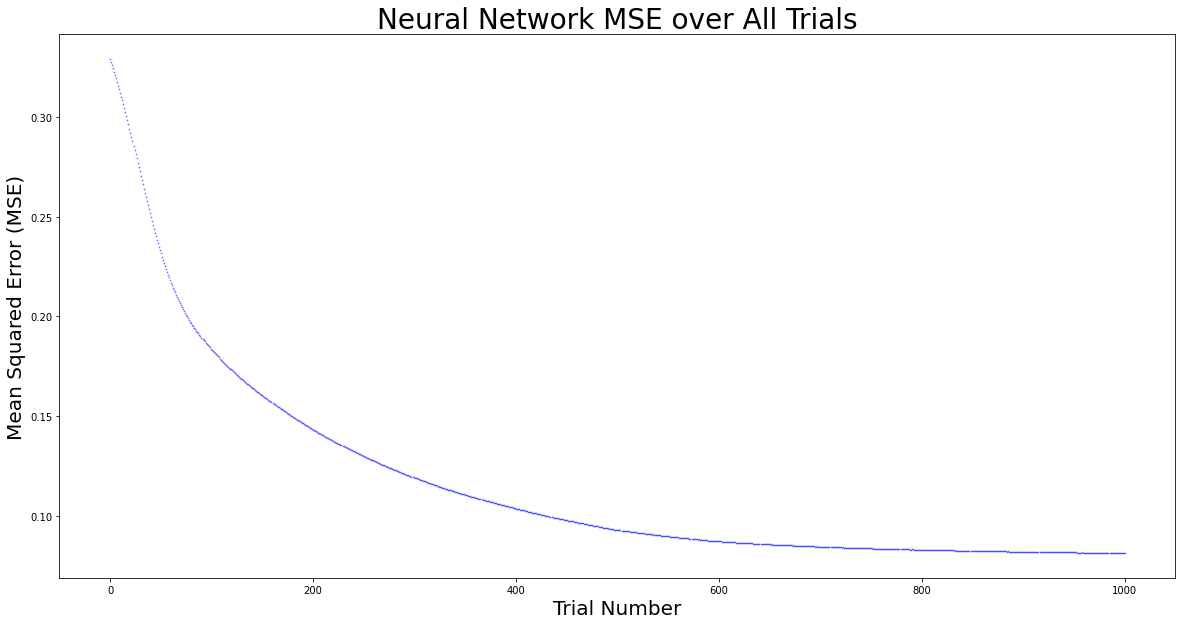

In [43]:
# plot 3
plt.figure(figsize = (20,10))

plt.xlabel(xlabel="Trial Number", fontsize = 20)
plt.ylabel(ylabel="Mean Squared Error (MSE)", fontsize = 20)
plt.title(label="Neural Network MSE over All Trials", fontsize = 28)

plt.scatter(x = trial3[0].index, 
            y = trial3[1]["MSE"],
            c = "blue",
            alpha = 0.5,
            s = 0.5)

plt.show()

## Conclusions

__In general, the neural network runs with smaller learning rate and more trials had lower final MSE values__. It helps to think of this situation like throwing particles at a screen door, where particle size represents learnng rate and a low MSE means that you threw a large mass of particles through the screen. Large particles will have a low chance of fitting through the fine mesh, but smaller particles (like sand) will have an easy time going through. The trouble is, in order to have a substantial mass of particles pass through the screen, you will need to spend a while throwing them through (running the network with learning rate 0.05 and number of trials 1000 took over 4 minutes)!